# **Decision Tree (Classification)**

In [ ]:
# !pip install category-encoders
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# import category_encoders as ce
from sklearn import preprocessing
# Train-Test Split
from sklearn.model_selection import train_test_split
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# For model evaulation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
import graphviz 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
def AUC_ROC(model,X_train, X_test, y_train, y_test) :
  # Training Data
  y_train_prob = model.predict_proba(X_train)
  fpr1, tpr1, thres1 = roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
  auc1 = auc(fpr1, tpr1)
  # testing Data
  y_test_prob = model.predict_proba(X_test)
  fpr2, tpr2, thres2 = roc_curve(y_test, y_test_prob[:,1], pos_label = 1)
  auc2= auc(fpr2, tpr2)
  #plotting
  plt.figure(figsize = (8,6))
  plt.plot(fpr1, tpr1, label = "Training: AUC-ROC = {0:.3f}".format(auc1),
            color = "tab:orange")
  plt.plot(fpr2, tpr2, label = "Testing: AUC-ROC = {0:.3f}".format(auc2),
            color = 'tab:blue')
  plt.plot(fpr1, fpr1, label = "FPR = TPR", color = 'black', linewidth=0.5)
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title("ROC Curve for " + model.__class__.__name__)
  plt.legend(loc = "lower right")
  plt.grid(which = 'both', axis = 'both')
  plt.show()
  pass

In [ ]:
# def nominal_to_ordinal(df, cat, target):
#   group = df.groupby([cat], as_index=False)[target].mean().sort_values(target)
#   cat_list = group[cat].values
#   feature_encoder = {cat_list[i]:i for i in range(len(cat_list))}
#   fig = go.Figure()
#   fig.add_trace(go.Bar(y = group[target], x=group[cat]))
#   fig.update_xaxes(title_text=cat)
#   fig.update_yaxes(title_text=target)
#   df[cat] = df[cat].map(feature_encoder)
#   return fig

def label_and_scaling(data,category_features,non_category,features,target):
  # label_encoder object knows how to understand word labels.
  label_encoder = preprocessing.LabelEncoder()
  # Encode labels in column 'species'.
  for each in category_features:
    data[each]= label_encoder.fit_transform(data[each])
  # from sklearn.preprocessing import StandardScaler
  # scaler = StandardScaler()
  # data[features] = scaler.fit_transform(data[features])
  print("Data after labeling:\n",data.head())
  data[target].value_counts().plot(kind='bar')
  plt.show()

In [ ]:
#@title

def output(data):
  choices=1
  while(choices<6):
    # choices+=1
    print("--------------------------")
    print("Enter 1 to view Dataset")
    # print("Enter 2 for Dataset information")
    print("Enter 2 for Decision Tree Classifier Model Result")
    print("Enter 3 for text form Decision Tree")
    print("Enter 4 for Visualization of Decision Tree")
    print("Enter 0 to END")
    print("--------------------------")
    user_input = int(input('Choice Number: '))
    if user_input >4:
      print("\nEnter Valid Input\n")

    if user_input==1:
      print("################ DATASET ###################")
      print("First Five Rows of the sample Dataset: \n",pd.DataFrame(data.head(5)))
      print("\n")
      print("Features List:\n", data.columns)
      columns = data.columns
      print("\n")
      print("Target Class:\n",columns[-1])
      print("############################################")
    # elif user_input==2:
    #   print("################ DATASET INFO ##############")
    #   print("Dataset Info:\n",data.info())
    #   print("\n")
    #   print("############################################")
    elif user_input==2:
      print("############## MODEL RESULTS ###############")
      columns = data.columns
      max_depth = int(input('Type Depth of the model: '))
      criterion = input("Type Criterion of the clssification from the following\n List : 'gini','entropy': ")
      ####################################################################################
      # class_names = {'Not Purchased':0, 'Purchased':1}
      # # Encoding Gender
      # encoder = ce.OrdinalEncoder(cols=['Gender'])
      # data = encoder.fit_transform(data)
      # # Seperated numerical and non numerical features
      # data_types = {k.name: v for k, v in data.columns.to_series().groupby(data.dtypes).groups.items()}
      # try:
      #     categorical_columns = data_types['object']
      # except:
      #     categorical_columns = []
      # cont_columns = [col for col in data.columns if col not in categorical_columns]
      # target = data.columns[-1]

      # for cat in categorical_columns:
      #   fig = nominal_to_ordinal(data, cat, target)
      #   fig.show(renderer="colab")

      features = data.columns[:-1]
      target =[data.columns[-1]]
      features =list(features)
      category_features = []
      non_category = []
      threshold = 19
      for each in data.columns:
          if data[each].nunique() < threshold:
            category_features.append(each)
          else:
            non_category.append(each)



      label_and_scaling(data,category_features,non_category,features,target)

      target_class = data.columns[-1]
      

      y = data[target_class]
      X = data.drop(target_class, axis=1).values
      

      # X = data.drop(target_class, axis = 1).values
      # y = data.loc[:, 'Purchased'].values

      #####################################################################################
      
      # Train test Split
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

      # Training model
      dtc = DecisionTreeClassifier(max_depth=max_depth,criterion=criterion)
      dtc.fit(X_train, y_train)
      ## Training report
      print("\n")
      print("ACCURACY:\n")
      print('Model accuracy score (Training set): {0:0.4f}'. format(accuracy_score(y_train, dtc.predict(X_train))))
      print('Model accuracy score (Test set): {0:0.4f}'. format(accuracy_score(y_test, dtc.predict(X_test))))
      print("\nClassification Report (Training set):\n")
      print(classification_report(y_train, dtc.predict(X_train))) #, target_names = class_names))
      print("Classification Report (Test set):\n")
      print(classification_report(y_test, dtc.predict(X_test)))#, target_names = class_names))
      print("\nConfusion Matrix (Train Set):\n")
      cm = confusion_matrix(y_train, dtc.predict(X_train))
      print(cm)

      print("\nConfusion Matrix (Test Set):\n")
      cm1 = confusion_matrix(y_test, dtc.predict(X_test))
      print(cm1)
    
      print("\nAUC ROC PLOT:\n")
      AUC_ROC(dtc, X_train, X_test, y_train, y_test)
      print("\n")
      print("############################################")
    elif user_input ==3:
      print("###### DECISION TREE (TEXT FORM) ###########")
      text_representation = tree.export_text(dtc)
      print(text_representation)
      print("############################################")
    elif user_input == 4:
      print("############## DECISION TREE ###############")
      print('Tree will be showed onced code execution ends...')
      plt.figure(figsize=(25,20))
      class_names_tree = data[columns[-1]].unique()
      features_names_tree = columns[:-1]
      # print(class_names_tree)
      # print(type(class_names_tree))
      tree.plot_tree(dtc, feature_names=features_names_tree, filled=True,proportion=True,rounded=True) 
      # tree.plot_tree(dtc, feature_names=['Gender', 'Age', 'EstimatedSalary'],class_names=['Purchased', "Not Purchased"],filled=True,proportion=True,rounded=True) 
      print("############################################")
    elif user_input==0:
      break
        


MODEL READY TO USE
################################
UPLOAD DATASET.
Instructions:
1. Name of the dataset should be 'data.csv'
2. Dataset should be in csv format
3. Last column of the dataset should be target class
--------------------------
Enter 1 to view Dataset
Enter 2 for Decision Tree Classifier Model Result
Enter 3 for text form Decision Tree
Enter 4 for Visualization of Decision Tree
Enter 0 to END
--------------------------
Choice Number: 1
################ DATASET ###################
First Five Rows of the sample Dataset: 
    Unnamed: 0  battery_power  mobile_wt  px_height  px_width   ram  price_range
0           0            842        188         20       756  2549            1
1           1           1021        136        905      1988  2631            2
2           2            563        145       1263      1716  2603            2
3           3            615        131       1216      1786  2769            2
4           4           1821        141       1208      1212 

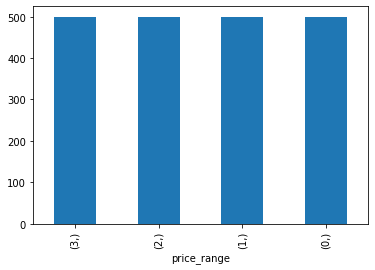



ACCURACY:

Model accuracy score (Training set): 0.8350
Model accuracy score (Test set): 0.8000

Classification Report (Training set):

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       395
           1       0.81      0.75      0.78       409
           2       0.74      0.77      0.76       408
           3       0.88      0.89      0.88       388

    accuracy                           0.83      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.83      0.83      1600

Classification Report (Test set):

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       105
           1       0.75      0.75      0.75        91
           2       0.63      0.72      0.67        92
           3       0.87      0.82      0.84       112

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg 

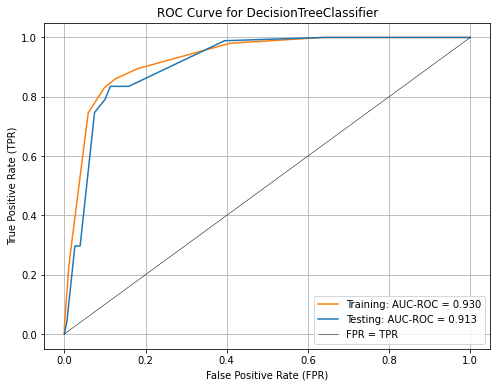



############################################
--------------------------
Enter 1 to view Dataset
Enter 2 for Decision Tree Classifier Model Result
Enter 3 for text form Decision Tree
Enter 4 for Visualization of Decision Tree
Enter 0 to END
--------------------------
Choice Number: 3
###### DECISION TREE (TEXT FORM) ###########
|--- feature_5 <= 2217.50
|   |--- feature_5 <= 1052.50
|   |   |--- feature_3 <= 1445.00
|   |   |   |--- feature_1 <= 1815.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1815.50
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  1445.00
|   |   |   |--- feature_1 <= 748.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  748.50
|   |   |   |   |--- class: 1
|   |--- feature_5 >  1052.50
|   |   |--- feature_1 <= 1007.50
|   |   |   |--- feature_5 <= 1541.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  1541.00
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  1007.50
|   |   |   |--- feature_5 <= 1896.50
|  

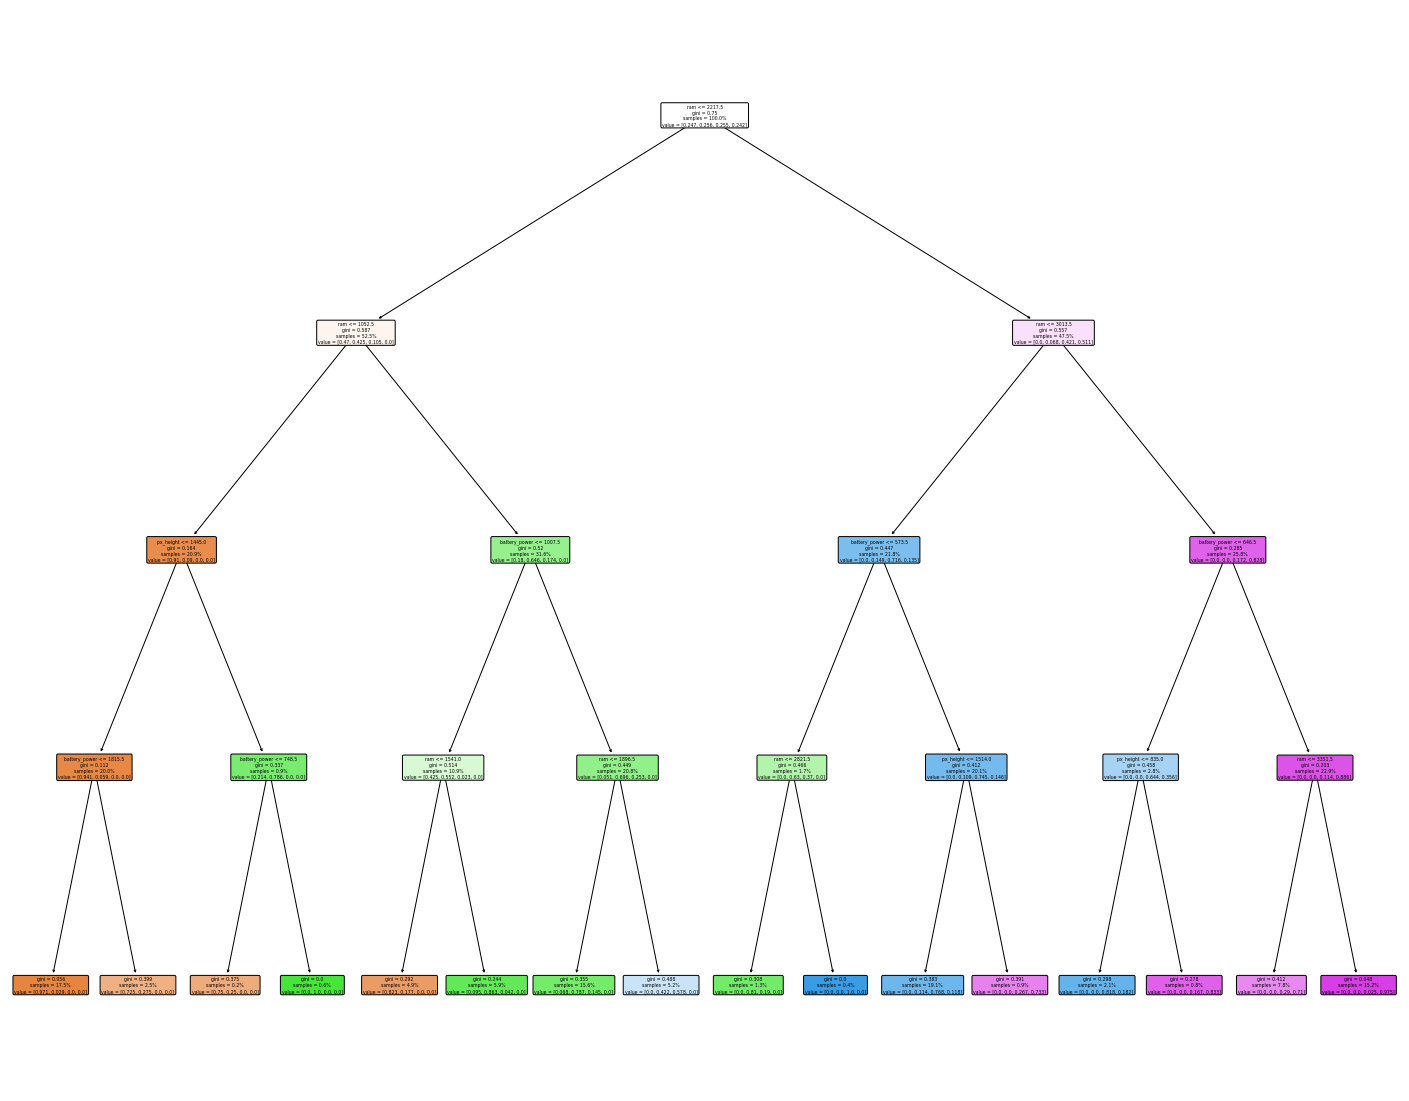

In [ ]:
from google.colab import files

print("MODEL READY TO USE")
print("################################")
print("UPLOAD DATASET.\nInstructions:\n1. Name of the dataset should be 'data.csv'\n2. Dataset should be in csv format\n3. Last column of the dataset should be target class")
# try:
# upload = files.upload()
# data = pd.read_csv({f'{data_name}.csv')
data = pd.read_csv('mobile_price.csv')
output(data)
print("\n################################\n")
# except:
#   print("Oops!  That was no valid file.  Try again...")


_____________________________________________________